In [29]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
from wordcloud import WordCloud, STOPWORDS 
import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['production_staff.csv', 'recruiting_costs.csv', 'core_dataset.csv', 'HRDataset_v9.csv', 'salary_grid.csv']


In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('../input/HRDataset_v9.csv')

df.head(5)

,Employee Name,Employee Number,MarriedID,MaritalStatusID,GenderID,EmpStatus_ID,DeptID,Perf_ScoreID,Age,Pay Rate,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,Hispanic/Latino,RaceDesc,Date of Hire,Days Employed,Date of Termination,Reason For Term,Employment Status,Department,Position,Manager Name,Employee Source,Performance Score
0,"Brown, Mia",1103024456,1,1,0,1,1,3,30,28.50,MA,1450,11/24/1987,Female,Married,US Citizen,No,Black or African American,10/27/2008,3317,NaN,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Diversity Job Fair,Fully Meets
1,"LaRotonda, William",1106026572,0,2,1,1,1,3,34,23.00,MA,1460,4/26/1984,Male,Divorced,US Citizen,No,Black or African American,1/6/2014,1420,NaN,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Website Banner Ads,Fully Meets
2,"Steans, Tyrone",1302053333,0,0,1,1,1,3,31,29.00,MA,2703,9/1/1986,Male,Single,US Citizen,No,White,9/29/2014,1154,NaN,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Internet Search,Fully Meets
3,"Howard, Estelle",1211050782,1,1,0,1,1,9,32,21.50,MA,2170,9/16/1985,Female,Married,US Citizen,No,White,2/16/2015,58,4/15/2015,N/A - still employed,Active,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Pay Per Click - Google,N/A- too early to review
4,"Singh, Nan",1307059817,0,0,0,1,1,9,30,16.56,MA,2330,5/19/1988,Female,Single,US Citizen,No,White,5/1/2015,940,NaN,N/A - still employed,Active,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Website Banner Ads,N/A- too early to review


I have created one more column **"Years_With_Company"** from **"Days Employed" **to find out the number of years , Employee has been working in the Company 

In [5]:
df.rename(columns=({'Days Employed':'Days_Employed'}),inplace=True)

def GetYears(Days_Employed):
    if ( Days_Employed >= 0 and Days_Employed <= 365  ):
        return "1 Year"
    if ( Days_Employed >= 365 and Days_Employed <= 730 ):
        return "2 Year"
    if ( Days_Employed >= 730 and Days_Employed <= 1095 ):
        return "3 Year"
    if ( Days_Employed >= 1095 and Days_Employed <= 1460 ):
        return "4 Year"
    if ( Days_Employed >= 1460 and Days_Employed <= 1825 ):
        return "5 Year"
    else: 
        return 'More than 5 Year'

df['Years_With_Company'] = df.apply(lambda x : GetYears(x['Days_Employed']), axis=1)

df.Years_With_Company.value_counts()

df.head()

,Employee Name,Employee Number,MarriedID,MaritalStatusID,GenderID,EmpStatus_ID,DeptID,Perf_ScoreID,Age,Pay Rate,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,Hispanic/Latino,RaceDesc,Date of Hire,Days_Employed,Date of Termination,Reason For Term,Employment Status,Department,Position,Manager Name,Employee Source,Performance Score,Years_With_Company
0,"Brown, Mia",1103024456,1,1,0,1,1,3,30,28.50,MA,1450,11/24/1987,Female,Married,US Citizen,No,Black or African American,10/27/2008,3317,NaN,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Diversity Job Fair,Fully Meets,More than 5 Year
1,"LaRotonda, William",1106026572,0,2,1,1,1,3,34,23.00,MA,1460,4/26/1984,Male,Divorced,US Citizen,No,Black or African American,1/6/2014,1420,NaN,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Website Banner Ads,Fully Meets,4 Year
2,"Steans, Tyrone",1302053333,0,0,1,1,1,3,31,29.00,MA,2703,9/1/1986,Male,Single,US Citizen,No,White,9/29/2014,1154,NaN,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Internet Search,Fully Meets,4 Year
3,"Howard, Estelle",1211050782,1,1,0,1,1,9,32,21.50,MA,2170,9/16/1985,Female,Married,US Citizen,No,White,2/16/2015,58,4/15/2015,N/A - still employed,Active,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Pay Per Click - Google,N/A- too early to review,1 Year
4,"Singh, Nan",1307059817,0,0,0,1,1,9,30,16.56,MA,2330,5/19/1988,Female,Single,US Citizen,No,White,5/1/2015,940,NaN,N/A - still employed,Active,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Website Banner Ads,N/A- too early to review,3 Year


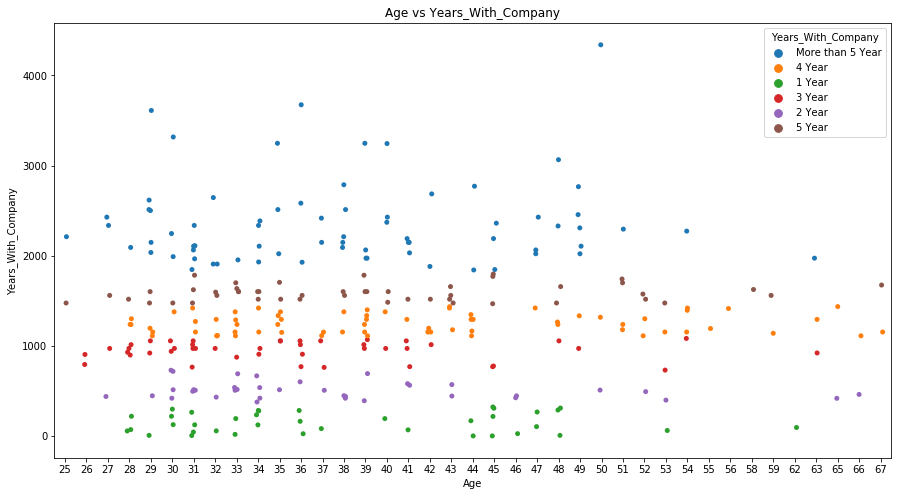

In [6]:
plt.figure(figsize=(15,8))
sns.stripplot(x='Age',y='Days_Employed',hue='Years_With_Company',data=df)
plt.xlabel('Age')
plt.ylabel('Years_With_Company')
plt.title('Age vs Years_With_Company')
plt.show()

In [7]:
# to see if there are no Nulls in the dataset
df.isnull().sum()

Employee Name            0
Employee Number          0
MarriedID                0
MaritalStatusID          0
GenderID                 0
EmpStatus_ID             0
DeptID                   0
Perf_ScoreID             0
Age                      0
Pay Rate                 0
State                    0
Zip                      0
DOB                      0
Sex                      0
MaritalDesc              0
CitizenDesc              0
Hispanic/Latino          0
RaceDesc                 0
Date of Hire             0
Days_Employed            0
Date of Termination    207
Reason For Term          0
Employment Status        0
Department               0
Position                 0
Manager Name             0
Employee Source          0
Performance Score        0
Years_With_Company       0
dtype: int64

In [8]:
# to check the type of dataset and to make sure that it makes sense
df.dtypes

Employee Name           object
Employee Number          int64
MarriedID                int64
MaritalStatusID          int64
GenderID                 int64
EmpStatus_ID             int64
DeptID                   int64
Perf_ScoreID             int64
Age                      int64
Pay Rate               float64
State                   object
Zip                      int64
DOB                     object
Sex                     object
MaritalDesc             object
CitizenDesc             object
Hispanic/Latino         object
RaceDesc                object
Date of Hire            object
Days_Employed            int64
Date of Termination     object
Reason For Term         object
Employment Status       object
Department              object
Position                object
Manager Name            object
Employee Source         object
Performance Score       object
Years_With_Company      object
dtype: object

In [9]:
#I have Groupby the Position to analyze the number of employees in the each respective Position
count=df.groupby(df["Position"]).count()
count = pd.DataFrame(count.to_records())
#count = count.sort_values(by= 'left', ascending = False)
count = count['Position']
count

0                     Accountant I
1         Administrative Assistant
2               Area Sales Manager
3                     BI Developer
4                      BI Director
5                              CIO
6                   Data Architect
7           Database Administrator
8           Director of Operations
9                Director of Sales
10                     IT Director
11                 IT Manager - DB
12              IT Manager - Infra
13            IT Manager - Support
14                      IT Support
15                Network Engineer
16                 President & CEO
17              Production Manager
18         Production Technician I
19        Production Technician II
20                   Sales Manager
21             Senior BI Developer
22         Shared Services Manager
23               Software Engineer
24    Software Engineering Manager
25                  Sr. Accountant
26                         Sr. DBA
27            Sr. Network Engineer
Name: Position, dtyp

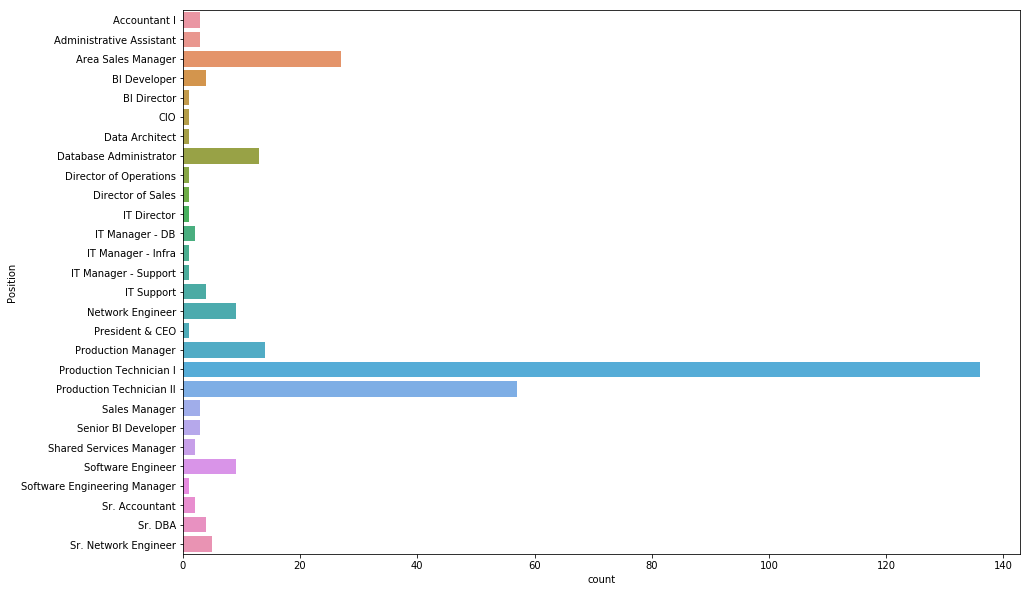

In [10]:
plt.figure(figsize=(15,10))
sns.countplot(y='Position', data=df,order=count )

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

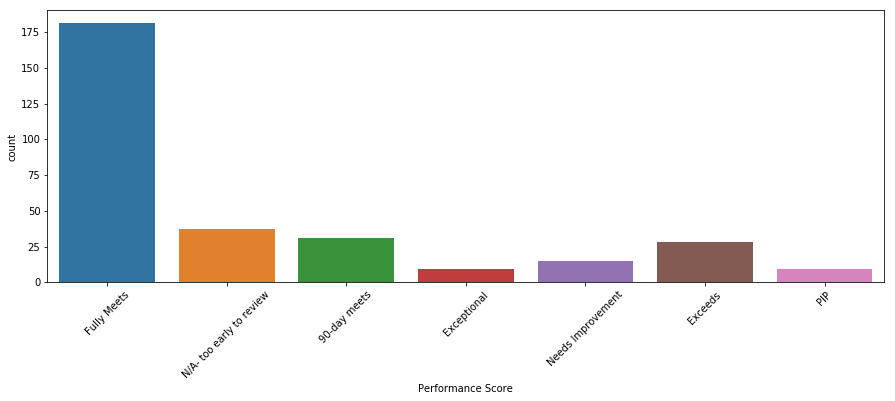

In [11]:
#A large number of People meets the Annual Performance Expectation
plt.figure(figsize=(15,5))
sns.countplot(x="Performance Score",data=df)
plt.xticks(rotation=45)

<Figure size 1800x1440 with 0 Axes>

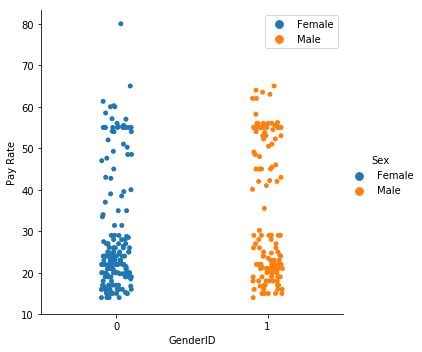

<Figure size 1800x1440 with 0 Axes>

In [12]:
#It seems that Pay rate is equal between  genders and it appears to be no discrimnation 
sns.catplot(x="GenderID",y="Pay Rate",hue="Sex",data=df ,legend_out =True)
plt.legend(loc=0)
plt.figure(figsize=(25,20))



Correlation in Python
Correlation values range between -1 and 1.

There are two key components of a correlation value:

magnitude – The larger the magnitude (closer to 1 or -1), the stronger the correlation
sign – If negative, there is an inverse correlation. If positive, there is a regular correlation.

(array([0.5, 1.5, 2.5]), <a list of 3 Text yticklabel objects>)

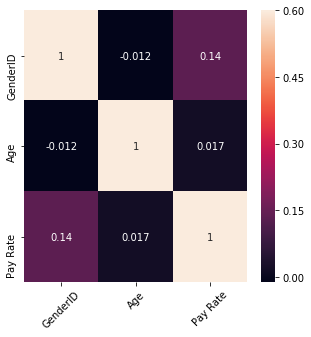

In [13]:
dfcorr=df[['GenderID','Age','Pay Rate']]
corr=dfcorr.corr()
plt.figure(figsize=(5,5))
sns.heatmap(corr,vmax=0.6,annot=True)
plt.xticks(rotation=45)
plt.yticks(rotation=90)

To see the Gender inclination in the Organization

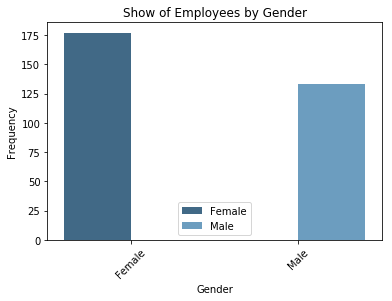

In [14]:
#Count the frquency of gender 
ax=sns.barplot(x=df['Sex'].value_counts().index,y=df['Sex'].value_counts().values,palette="Blues_d",hue=['Female','Male'])
plt.legend(loc=8)
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Show of Employees by Gender')
plt.xticks(rotation=45)
plt.show()


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


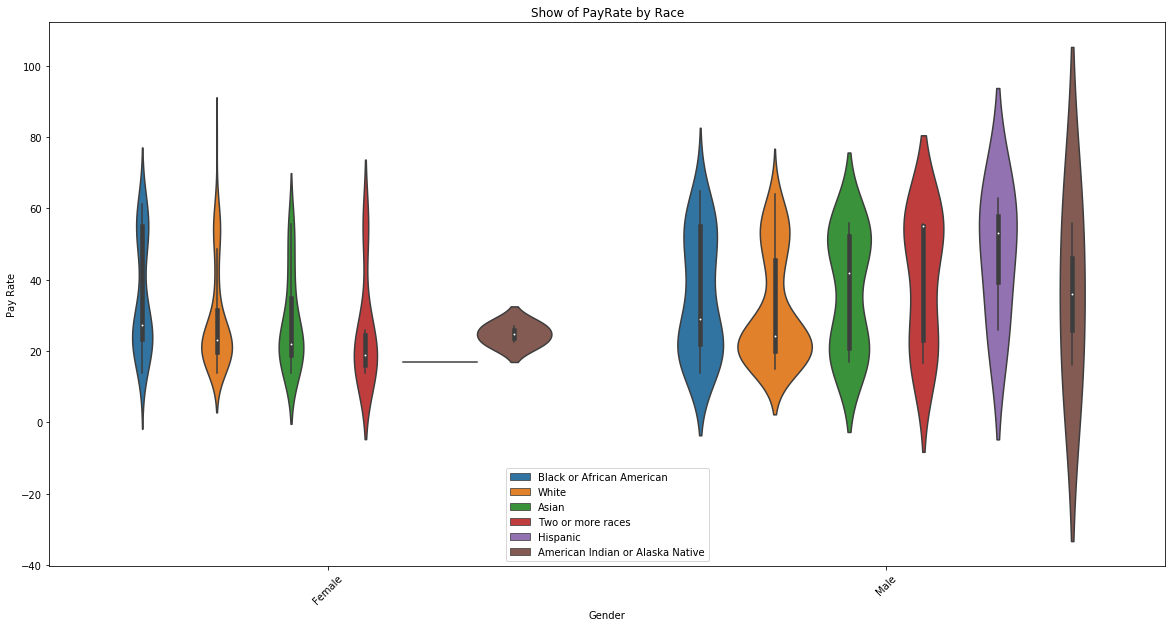

In [15]:
#This graph shows the Pay rate per Gender and Race
plt.figure(figsize=(20,10))
ax = sns.violinplot(x="Sex", y="Pay Rate",data=df,hue="RaceDesc")


plt.legend(loc=8)
plt.xlabel('Gender')
plt.ylabel('Pay Rate')
plt.title('Show of PayRate by Race')
plt.xticks(rotation=45)
plt.show()

A visual prespective of Pay rate per Position in the Organization

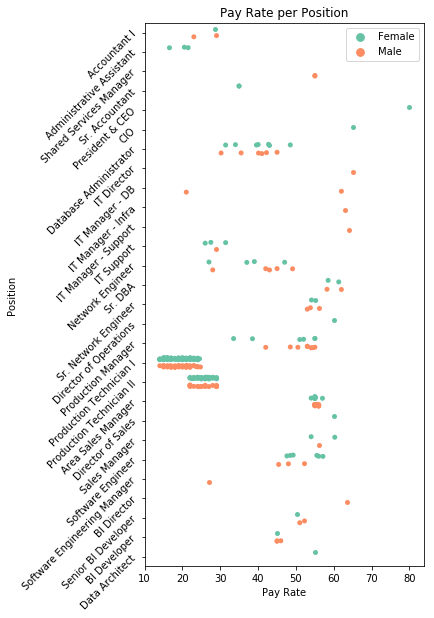

In [16]:
plt.figure(figsize=(5,10))
sns.stripplot(data=df, x="Pay Rate",y="Position",hue="Sex",jitter=True,dodge=True,palette="Set2",)
plt.legend(loc=0)
plt.xlabel('Pay Rate')
plt.ylabel('Position')
plt.title('Pay Rate per Position')
plt.yticks(rotation=45)
plt.show()


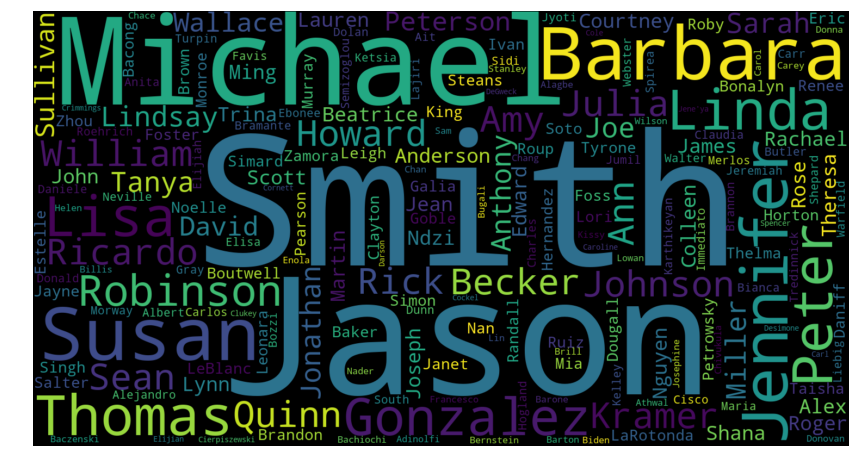

In [32]:
from wordcloud import WordCloud, STOPWORDS
all_locations = ','.join(df['Employee Name'].values)

wordcloud = WordCloud(width=1500, height=800).generate(all_locations)

plt.figure(figsize=(20, 8))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()